Redes Neuronales - Backpropagation
---
<img src="img/01.png" alt="drawing" />

<img src="img/02.png" alt="drawing" width="1500"/> 

---

<img src="img/03.png" alt="drawing" width="1500"/> 

---

<img src="img/04.png" alt="drawing" /> 

---

# Cantidad de coeficientes (niveles y parámetros $\beta$).

### Un poco de teoría de Optimización:

El problema de optimización es básicamente encontrar una función $f^*_{\mathcal{F}}$ que minimice el riesgo

$$E[f^*_{\mathcal{F}}]=\underset{f\in\mathcal{F}}{min} E[f] = \underset{f\in\mathcal{F}}{min} \int \mathcal{L}(Y, f(X;\beta)) P(X,Y) dX dY$$

#### Por Aproximación (Error de Bayes):

* Es **imposible** determinar una función $f^*_{\mathcal{F}}$ entre todas las posibles funciones.
* En cambio, Se busca $f^*_{\mathcal{F}(\beta)}$ una función que minimiza $ E[\mathcal{L}(Y, f(X;\beta))]$ a partir de una colección de funciones parametrizadas $\mathcal{F}(\beta)$ (Todas las posibles funciones que puede representar una red neuronal).
$$E[f^*_{\mathcal{F}(\beta)}]=\underset{f\in\mathcal{F}_\beta}{min} E[f] = \underset{f\in\mathcal{F}_\beta}{min} E[\mathcal{L}(Y, f(X;\beta))]$$

El **Error de Bayes** es el error teórico, y la cota mínima del error, justamente por aproximar mediante un conjunto de funciones que, en principio, no generan la función buscada.  Es lo se hace con una red neuronal durante el entrenamiento. Se busca **aproximar** a una función, que no es conocida, y que vive en un espacio de infinitas funciones mediante una colección de funciones definidas por $\beta$.

#### Estimación:

* Pero es **imposible** determinar $f^*_{\mathcal{F}(\beta)}$ . No se puede determinar la  $E[\mathcal{L}(Y, f(X;\beta)]$, porque no se conoce la distribución de probabilidad $P(x,y)$. 
* Lo que se puede hacer es busca $f^*_n$ que minimice el **promedio** del costo $\mathcal{L}(Y, f(X;\beta))$, 

$$E[f^*_n]= \underset{f\in\mathcal{F}(\beta)}{min} E[f] \approx \frac{1}{n} \sum_{i=0}^{n} \mathcal{L}(Y, f(X;\beta))$$

#### Entonces, hay un Error en Exceso, o Error de Entrenamiento.
El error por aproximación es el óptimo, el exceso de error es por causa de la estimación, es decir, por el entrenamiento de la red.

$$\epsilon_{entrenamiento} = E[f^*_n] - E[f^*_{\mathcal{F}(\beta)}] = (E[f^*_n] - E[f^*_{\mathcal{F}}]) + (E[f^*_{\mathcal{F}}] - E[f^*_{\mathcal{F}(\beta)}]) = \epsilon_{estimación} + \epsilon_{aproximación}$$

<img src="img/11.png" alt="drawing" width="500"/> 

Vapnik and Chervonenkis, Ordered risk minimization, 1974

<div class="alert alert-block alert-danger">
    
<b>Conclusión:</b> Aumentar la cantidad de parámetros disminuye el error de aproximación, es decir, el estimador empieza a imitar lo que los datos le muestran. El problema es que deja de estimar. Es decir, al aumentar la cantidad de parámetros, se le da la posibilidad a la red de que *memorice* los datos. Esto es **overfitting**. 
Aumentar la cantidad de parámetros requiere, entonces, aumentar la cantidad de muestras de entrenamiento.
</div>

# Back Propagación

Bryson & Ho [1969]; Werbos [1974]; Parker [1985]; Rumelhart, Hinton & Williams [1986a]; Le Cun [1985]

## Modelo de Redes Neuronales. 
<img src="img/12.png" alt="drawing" width="400"/> 

Se tiene una red similar a la de la figura, la cual posee entradas $X_k$, y como salida $O_i$, donde existe un nivel oculto con neuronas $V_j$. La relación entre estas variables está dada por:

$$ O_i = g \left ( \sum_j W_{ij} V_j \right)$$

siendo $g(\bullet)$ la función de activación. Esta ecuación se denomina "ecuación de salida", y da inicio al proceso de optimización. Por otra parte, las variables $V_j$ son la salida del nivel oculto, y tiene la forma:

$$ V_j = g \left(\sum_k w_{jk} X_k \right)$$

donde $X_k$ es la entrada a la red y constituye el vector de entrada. **Nota: aquí se asume que el parámetro de ordena $b$ se integró al peso, y el vector de entrada a la red posee una variable más con valor 1**

Si bien esta última ecuación responde a la entrada de la red, si hubieran un nivel ocultos intermedios adicionales, se puede generalizar planteando

$$ V_j^m = g \left(\sum_k w_{jk} V_k^{m-1} \right)$$

siendo $m$ el nivel de la red, donde $V_k^0 = X_k$. Desde ya, los índices $j$ y $k$ tendrán un recorrido adecuado a la topología de cada nivel.

Finalmente, para el ejemplo en cuestión, la ecuación de la red, o estimado, es,

$$ O_i = g \left ( \sum_j W_{ij}  g \left(\sum_k w_{jk} X_k \right) \right)$$

## Entrenamiento - Optimización.

Igual que antes, la red es un estimador $\hat{Y}(X;W) = O(X;W)$

y se define un costo de estimar mal, o función de $\mathcal{Loss}$:

$$\mathcal{Loss}(Y,X;w_{i,j}) = \left \| Y - O(X;w_{i,j}) \right \|^2 $$

$$\mathcal{Loss}(Y,X;w_{i,j}) = \frac {1}{2}\left ( \sum Y_i  - g \left ( \sum_j W_{ij}  g \left(\sum_k w_{jk} X_k \right) \right) \right )^2 $$

Luego, se ajustan los pesos mediante aproximaciones sucesivas:

$$ w_{i,j}^n = w_{i,j}^{n-1} - \eta \; \nabla_{w_{ij}} \mathcal{Loss}(Y, X;w^{n-1})$$

donde el gradiente relativo a cada peso está dado por:

$$\Delta w_{i,j} = - \eta \; \nabla_{w_{ij}} \mathcal{Loss}(Y, X;w) = - \eta \; \frac{\partial \mathcal{Loss}(Y,X;w)}{\partial w_{ij}}$$



donde $\eta \ll 1$ es la velocidad de aprendizaje y $n \in \mathbb{N}$ es el paso de aprendizaje. 

**Nota: Se va a considerar el algoritmo de Gradiente Descendente Estocástico, generando el gradiente a partir de una muestra. En caso de desarrollar el GD clásico, la actualización del los pesos se debe realizar sobre el promedio de todas las muestras**

#### Conexión oculto-salida:
Como punto de partida para determinar el algoritmo de optimización se plantea determinar la actualización de los pesos $W_{ij}$, que corresponden a la conexión entre el nivel oculto $V_j$ y la salida $O_i$

$$ O_i = g \left ( \sum_j W_{ij} V_j \right)$$

Por lo tanto la actualización de los pesos estará dada por 

$$\begin{array}\\
\Delta W_{ij} = - \eta \frac{\partial \mathcal{Loss}}{\partial W_{ij}} & = \eta \left (Y_i - O_i \right)g'(h_i) V_j\\
~ & = \eta \; \delta_i \; V_j
\end{array}$$

donde $h_i = \sum_j W_{ij} V_j$ y 

$$ \delta_i = \left (Y_i - O_i \right)g'(h_i)$$

$\delta_i$  es un término importante del algoritmo, y se identificará su estructura a lo largo del algoritmo.

#### Conexión entrada - oculto:

<img src="img/13.png" alt="drawing" width="500"/> 

En este caso, se busca determinar el gradiente para los pesos río abajo, $w_{jk}$. Empleando la regla de la cadena se llega al gradiente:

$$\begin{array}\\
\Delta w_{jk} & = - \eta \frac{\partial \mathcal{Loss}}{\partial w_{jk}} =  -\eta \frac{\partial \mathcal{Loss}}{\partial V_j} \frac{\partial V_j}{\partial w_{jk}}\\
~& =  \eta \; \sum_i \left (Y_i - O_i \right)g'(h_i) W_{ij} \frac{\partial V_j}{\partial w_{jk}}\\
~& =  \eta \; \sum_i \delta_i \; W_{ij} \; \frac{\partial V_j}{\partial w_{jk}}\\
~& =  \eta \; \sum_i \delta_i \; W_{ij} \; g'(h_j)\;X_k \\
\Delta w_{jk}  & =  \eta \; \delta_j \; X_k
\end{array}$$



siendo $h_j =  \sum_k w_{jk} X_k$, y

$$ \delta_j = g'(h_j) \; \sum_i W_{ij} \; \delta_i$$

### Propagación hacia atrás del Error. Generalización

<img src="img/12.png" alt="drawing" width="400"/> 

En la determinación de la variación de los pesos $w_{jk}$ se puede observar una propagación del error de estimación $\epsilon_i = (Y_i - O_i)$. En efecto, se puede escribir a $\delta_i$ como
$$\delta_i = (Y_i - O_i) g'\left(\sum_j W_{ij} V_j\right) = \; g'\left(\sum_j W_{ij} V_j\right) \; \epsilon_i $$

Luego, el error se propaga hacia atrás en la red,

$$ \delta_j = g'\left(\sum_k w_{jk} X_k\right) \; \sum_i W_{ij} \; \delta_i = g'\left(\sum_k w_{jk} X_k\right) \epsilon_j$$

y finalmente se determina la variación de los parámetros

$$\Delta w_{jk}   =  \eta \; \delta_j \; V_k$$

## Algoritmo de Backpropagation 

### Derivadas.

Las funciones de activación son particularmente eficientes computacionalmente hablando. Por ejemplo, las siguientes funciones de activación,


1. $g(h) =  \frac{1}{1 \; + \; exp(-2 \alpha h)}$
2. $g(h) =  tanh(\alpha \; h)$
3. $g(h) =  ReLU(h)$


poseen las siguientes derivadas primeras, 


1. $g'(h) = 2 \alpha g(1-g)$
2. $g'(h) = \alpha (1-g^2)$
3. $g'(h) = \left \{ \begin{array}\\
1 & h \geq 0 \\
0 & h < 0
\end{array} \right .$

Como se observa, no se requiere estimar la derivada, basta conocer la función de activación.

---

<img src="img/09.png" alt="drawing" width="1500"/> 
El algoritmo de backpropagación es empleado en redes profundas, pero se emplean unidades lineales rectificadas **Relu**. Esto se debe a dos motivos, primero no desvanecen el gradiente, como es el caso de las neuronas con función de activación **tanh** u otras, y segundo, son muy simples computacionalmente hablando.

### Algoritmo.

1. Inicializar todos los pesos para los m-niveles $w_{ij}^m$ con pequeños valores aleatorios.
2. Seleccionar una muestra $X$ y aplicarlo al layer de entrada (m=0) $$V_k^0 = X_k \; \forall k$$
3. Propagar la muestra por la red: $$V_i^m = g(h_i^m)=g \left( \sum_j \; w_{ij}^m \; V_j^{m-1} \right)$$ para todo $i$ y nivel $m$, hasta el último nivel $V_i^M$. 
4. Calcular la propagación del error, empezando por el nivel de salida $\delta_i^M$: 
$$ \delta_i^M = g'(h_i^M)\;(Y_i-V_i^M)$$
5. Calcular la propagación del error en todos los niveles de la red $$\delta_i^{m-1}=g'(h_i^{m-1})\sum_j w_{ij}^m \delta_j^m$$
para $m = M, M-1, \dots, 2$. 
6. Calcular la variación de los pesos $w_{ij}^m$ $$\Delta w_{ij}^m = \eta \; \delta_i^m V_j^{m-1}$$
7. Retroceder al nivel 2 y repetir el proceso.

#  Aplicación de Perceptron multicapas en un problema de regresión.

## Regresión sobre muestras de la función $y = \sin(x)$

Entonces, vamos a buscar de aproximar con un modelo a la función $ y = \sin(x)$.

Esto es un problema de regresión, no de clasificación. En este caso, no hay un conjunto numerable de labels.  

Se definen,

* $X = \left \{ x_0, x_1, \cdots, x_n \right \}$, un conjunto de elementos tales que $x_j \in [0,2\pi]$ y $n \in \mathbb{N}$.
* $y = \sin(X) = \left \{ \sin(x_0), \sin(x_1), \cdots, \sin(x_n) \right \}$ al conjunto de evaluación $y_i = \sin(a_i)$


el *corpus* de entrenamiento $\mathbf{C}$ se constituye mediante el conjunto de tuplas 

$$ \mathbf{C} = \left \{ (x_i, y_i) \right \} $$

donde cada tupla consiste una muestra de entrenamiento supervisado.

Se define un Perceptron multicapa con,

* una entrada
* un layer oculto de 6 neuronas.
* un layer de salida con una neurona.

Cada neurona tiene como función de activación,


$$f(v) = \tanh(v) = \frac {e^v - e^{-v}}{e^v + e^{-v}}$$

quedando definida la unidad: 

$$ O = g \left( \sum_j w_j ~ V_j(I) + b \right )$$ 

donde $V_j$ son las entradas a la neurona, $b$ es el parámetro de bias, $w_j$ son los pesos, y finalmente $O$ es la salida de la neurona.




<img src="img/05.png" alt="drawing" width="1500"/> 

---

## ¿Cómo entrenar? - Validación Cruzada (Cross-Validation)

Las redes neuronales, particularmente las redes profundas, son muy propensas al overfitting, es decir, tienden a memorizar los datos de entrenamiento, **disminuyendo el error de aproximación**, pero **aumentando el error de estimación** y por lo tanto no el estimador no generaliza.

Para reducir este problema, se desarrollaron técnicas de entrenamiento con validación. Existen diferentes variantes, aquí se discutirán sólo algunas:

<img src="img/10.png" alt="drawing" width="1500"/> 

Este procedimiento suele emplearse en redes de aprendizaje profundo con gran cantidad de datos.

### Curvas de Exactitud y Loss.

Durante el aprendizaje, al finalizar una época, se recaban las mediciones de $Loss$, la última de la etapa de entrenamiento, y el resultado de la etapa de validación. Ello permite generar gráficas que permiten controlar el aprendizaje,

<img src="img/15.png" alt="drawing" width="1500"/> 


Alternativamente al parámetro de Exactitud (Accuracy) se plantea el **coeficiente de determinación $R^2$**, también llamado $R^2 Score$

$$R^2Score = 1 - \frac{u}{v} = 1 - \frac{\sum (y_{true}-y_{pred})^2}{\sum (y_{true} - E[y_{true}])^2}$$

donde $u$ es el residuo, o error cuadrático medio y $v$ es relativo a la varianza del valor verdadero. $R^2Score \in [0,1]$ donde $R^2Score =1$ implica que el modelo aprendió a predecir todas las muestras. Un indicio de overfitting.  En el ejemplo se empleará $R^2Score$, en lugar de la Exactitud, el cual es una medida más adecuada para cuando se trata de estimación por regresión.

### K-Fold Cross-Validation.

Cuando se tiene un conjunto de entrenamiento con relativamente pocos datos, se puede dividir el conjunto de datos en un conjunto de entrenamiento de 80% del conjunto de datos, y otro de 20% como conjunto testeo. Este procedimiento implica que el estimador no se entrenará en los datos de testeo, generando un sesgo. Existen procedimientos más robustos como K-fold Cross Validation.

<img src="img/14.png" alt="drawing" width="1500"/> 


### Implementación con Scikit-Learn

La optimización que se empleará es **Adam** (`activation = 'adam'`), que una implementación de gradiente descendente estocástico realizada por <a href="https://arxiv.org/abs/1412.6980">Kingma, Diederik y Ba</a>. 

Otra posibilidad es la de **Broyden–Fletcher–Goldfarb–Shanno** con poco uso de memoria, (`activation = 'lbfgs'`) desarrollada por <a href="https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.645.5814">Byrd, Lu y Nocedal</a>. esta optimización es de segundo orden, es decir con derivadas parciales segundas, y por lo tanto trabaja sobre la matriz Hessiana, y no sobre el gradiente. Posee mejor convergencia, pero a un mayor costo. Tiene la inconveniencia que converge a puntos de montura. No se emplea en deep learning.

También se puede emplear **SGD**, (`activation = 'sgd'`)que es el algoritmo de optimización estudiado aquí.



### El corpus de datos $[X, y]$ y $[X_{test}, y_{test}]$

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

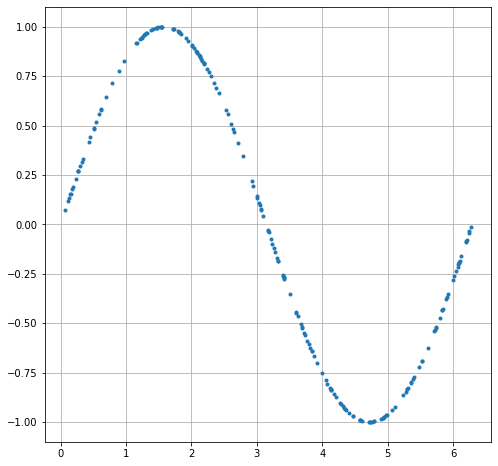

In [2]:
n_muestras = 200
# selección aleatoria muestras del dominio [0,2*pi]
X = np.random.rand(n_muestras,1)*2*np.pi
# salida esperada
y = np.sin(X).reshape(-1)

n_test = 100
# selección aleatoria muestras del dominio [0,2*pi]
X_test = np.random.rand(n_test,1)*2*np.pi
# salida esperada
y_test = np.sin(X_test).reshape(-1)

plt.figure(figsize=(8,8))
plt.plot(X,y,'.')
plt.grid()

### Definición del Modelo de Regresión

In [12]:
clf = MLPRegressor(hidden_layer_sizes=(20,6,), #layers ocultos (#Neuronas Hidden Layer 1,#NHL2,#NHL3,...,)
                   activation='relu', # función de activación
                   batch_size = 1,
                   early_stopping = True,  # detiene el aprendizaje cuando no se encuentran mejores soluciones
                   validation_fraction = .2, # 0.2 :  20% del cuerpo de entrenamiento para validación.
                   solver='adam',  # Optimizador
                   learning_rate='adaptive', # Velocidad de aprendizaje (eta)
                   max_iter=1200, # Cantidad máxima de epocas.
                   alpha=0.001, # Termino de normalización. Penalización en L2
                   #verbose = True
                   )

### Entrenamiento y Testing.

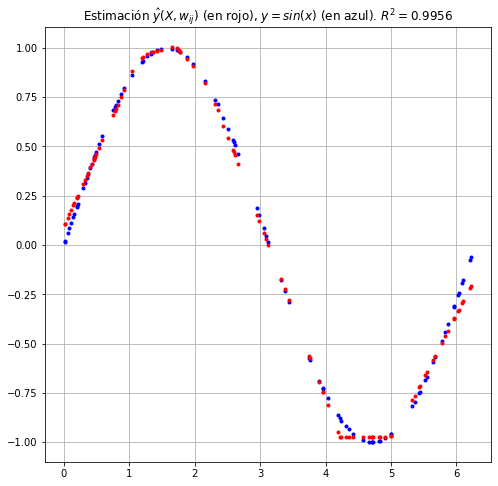

In [13]:
# Entrnamiento:
clf.fit(X, y)

# Testing
y_out = clf.predict(X_test)  # estimación
r2s = r2_score(y_test,y_out) #R2 Score

fig = plt.figure(figsize=(8,8))
plt.plot(X_test,y_test,'b.')
plt.plot(X_test,y_out,'r.')
plt.title(r'Estimación $\hat{y}(X,w_{ij})$ (en rojo), $y=sin(x)$ (en azul). $R^2=$'+ f'{r2s:.4f}')
plt.grid()


### Curvas descriptivas del aprendizaje.

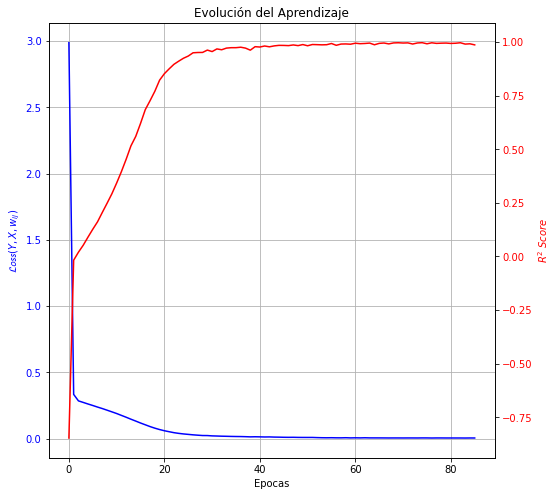

In [14]:
# Evolución del Aprendizaje

ax = plt.figure(figsize=(8,8)).subplots()
ax.plot(clf.loss_curve_ ,'b')
ax.set_xlabel('Epocas')
ax.set_ylabel(r'$\mathcal{Loss}(Y,X,w_{ij})$', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Evolución del Aprendizaje')
ax.grid()
ax2 = ax.twinx()
ax2.plot(clf.validation_scores_,'r')
ax2.set_ylabel(r'$R^2\;Score$', color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.tight_layout()


#### Considere evaluar

A modo de práctica, modificar `MLPRegressor` 
1. Empleando`activation = 'sgd'` y luego con `activation = 'lbfgs'` como optimizadores.
2. Pruebe con una función de activación **Relu**, `activation='relu'`. Se verá que no funciona, se necesita aumentar la complejidad de la red, para ello defina `hidden_layer_sizes=(20,6)` y para ayudar a una mejor convergencia mantenga `activation = 'lbfgs'`.

Comente las diferencias.

# Ejercicio necesario.

Se propone implementar el modelo de regresión de $y = sen(x)$ mediante el perceptron multicapa del ejemplo, es decir con una entrada y una salida, y una capa oculta de 6 neuronas. Cada neurona responde al modelo,

$$ V_i = f \left( \sum_j w_{i,j} ~ V_j + b_i \right )$$ 

donde la función de activación $f(\bullet) = tanh(\bullet)$


1. Desarrollar y determinar las expresiones correspondiente a $\Delta w_{j,k}$. En particular, a partir de la definición $\Delta w_{j,k} = - \eta \frac{\partial Loss}{\partial w_{j,k}}$ determinar que $$ \Delta w_{j,k} = \eta \sum_\mu \delta_j^\mu V_k^\mu$$ con $ \delta_j^\mu = f'(h_j^\mu)\sum_i w_{i,j}~ \delta_i^\mu $.

2. Implementar el perceptron multicapa con 6 neuronas en el nivel oculto.
3. Implementar el algoritmo de backpropagación considerando que se entrena de a una muestra por vez.
4. Entrenar el perceptron multicapa aplicando un protocolo de entrenamiento adecuado. Emplear por ejemplo $\eta = 0.001$, o generar una variante adaptativa al error.
5. Informar la calidad del entrenamiento y $R^2$ o la Exactitud resultante.
